# CNC Mill Tool Wear


## Table of contents<a name=top></a>1. [Data describtion](#des)<br> 
1. [Import libraries](#import)<br> 
1. [Load Datasets](#load)<br>
1. [Pre-processing](#pre)<br>
    * [Missing values](#miss)<br>
    * [Merge Data](#merge)<br>
    * [Preparing data](#prepare)<br>
    * [Visualization and statistical analysis](#vis)<br>


## Data describtion<a name=des></a>
In this project, a CNC milling machine was used to perform machining experiments. The CNC machine recorded machining data for different settings of tool condition, feed rate, and clamping pressure. More details about the dataset can be found [here](https://www.kaggle.com/datasets/shasun/tool-wear-detection-in-cnc-mill/data).<br>
The CNC machine had 4 motors (X, Y, Z axes and spindle) that generated time series data with a 100 ms interval in 18 machining experiments. The output of each experiment showed the tool condition (whether the tool was worn or not) and the result of visual inspection. This dataset is useful for finding tool wear or poor clamping.

## Import libraries<a name=import></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

## Load datasets<a name=load></a>

In [2]:
train_data=pd.read_csv(r'E:/udemy/proj/train.csv')
print(f'shape of train_data : {train_data.shape}')
train_data.head(2)

shape of train_data : (18, 7)


,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No                        18 non-null     int64  
 1   material                  18 non-null     object 
 2   feedrate                  18 non-null     int64  
 3   clamp_pressure            18 non-null     float64
 4   tool_condition            18 non-null     object 
 5   machining_finalized       18 non-null     object 
 6   passed_visual_inspection  14 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


In [4]:
experiment_01 = pd.read_csv(r"E:/udemy/proj/experiment_01.csv")
print(f'shape of experiment_01 : {experiment_01.shape}')
experiment_01.head(2)

shape of experiment_01 : (1055, 48)


,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.0,198.0,0.0,0.0,0.18,0.0207,329.0,2.77,...,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.0,198.0,-13.6,-358.0,-10.90,0.1860,328.0,23.30,...,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep


In [5]:
experiment_02 = pd.read_csv(r"E:/udemy/proj/experiment_02.csv")
print(f'shape of experiment_02 : {experiment_02.shape}')
experiment_02.head(2)

shape of experiment_02 : (1668, 48)


,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.0,198.0,0.0,0.0,-0.284,2.790000e-19,329.0,0.0,...,-1.86,0.0,332.0,0.0,0.0,12.0,1.0,2.0,50.0,Prep
1,198.0,0.0,0.0,198.0,0.0,0.0,-0.284,2.790000e-19,329.0,0.0,...,-1.86,0.0,332.0,0.0,0.0,12.0,0.0,0.0,50.0,Prep


## Pre-processing<a name=pre></a>
### Missing_values<a name=miss></a>
As it is seen in the `train_data.info()`, the `train_data` has some Non-values in the column passed_visual_inspection, which is indeed "No", i.e. the machining process was not passed the final test. Therefore, we can replace these missing-values by "No".

In [6]:
train_data['passed_visual_inspection'].fillna('no',inplace=True)
train_data.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,no
4,5,wax,20,3.0,unworn,no,no


## Merge data<a name=merge></a>
We can merge all experiments and add each row of train_data to the experiments. As you can see in the 'material' column, the only material is "Wax". Therefore, we can drop this column.

In [7]:
train_data['material'].unique()

array(['wax'], dtype=object)

In [8]:
Merge_frame = []
for i in range(1,19):
    exp_number = '0' + str(i) if i < 10 else str(i)
    exp_data = pd.read_csv(f"E:/udemy/proj/experiment_{exp_number}.csv")

    train_data_row = train_data[train_data['No'] == i]
    exp_data['exp_number'] = i
    #add each column of our train_data to the experiments
    exp_data['feedrate'] = train_data_row.iloc[0]['feedrate']
    exp_data['clamp_pressure'] = train_data_row.iloc[0]['clamp_pressure']
    exp_data['tool_condition'] = train_data_row.iloc[0]['tool_condition']
    exp_data['machining_finalized'] = train_data_row.iloc[0]['machining_finalized']
    exp_data['passed_visual_inspection'] = train_data_row.iloc[0]['passed_visual_inspection']

    Merge_frame.append(exp_data)

merged_data = pd.concat(Merge_frame, ignore_index = True)
merged_data.head(2)

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_number,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.0,198.0,0.0,0.0,0.18,0.0207,329.0,2.77,...,1.0,0.0,50.0,Starting,1,6,4.0,unworn,yes,yes
1,198.0,-10.8,-350.0,198.0,-13.6,-358.0,-10.90,0.1860,328.0,23.30,...,1.0,4.0,50.0,Prep,1,6,4.0,unworn,yes,yes


In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

## Preparing data<a name =prepare></a>
Now we can prepare our data frames to be used in our model. We will look at columns and one hot or number the object columns.

In [10]:
merged_data['Machining_Process'].unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

In [11]:
merged_data['Machining_Process'].value_counts()

Machining_Process
Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2585
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1795
end                 8
Starting            1
Name: count, dtype: int64

I assume 'End' and 'end' are the same result in the "Machining_Process" column. So we can use only 'End'. In addition, we have only one row with the value "Starting", so I think it can be included in the "Prep" category.

In [12]:
merged_data.replace({'Machining_Process':{'end':'End','Starting':'Prep'}},inplace=True)
merged_data['Machining_Process'].unique()

array(['Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'End'],
      dtype=object)

I think since the values in `Machining_Process` are independent, we can consider one of the cases and see the machine's performance. Then if the machine works properly or fails the exams in one or more cases, we can warn that this machine is probably not working properly. 

In [16]:
Machining_Process_goups=merged_data.groupby('Machining_Process')
dfs=[Machining_Process_goups.get_group(x) for x in Machining_Process_goups.groups]
d={}
for i, j in enumerate(dfs):
    idx = str(i+1)
    name = 'df_'+idx
    d[name]=dfs[i]
d['df_1'].head(2)

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,exp_number,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
1047,141.0,0.100,62.5,141.0,0.0,0.0,-4.23,0.0430,326.0,5.54,...,1.0,130.0,50.0,End,1,6,4.0,unworn,yes,yes
1048,141.0,0.175,93.7,141.0,0.0,0.0,-3.73,0.0479,325.0,5.97,...,1.0,132.0,50.0,End,1,6,4.0,unworn,yes,yes


there are three test results, "tool_condition", "machining_finalized", "passed_visual_inspection", which we want to detect if a machine will pass them or not. So for each data_frame, we will detect these three variables. <br>
But now, we can also remove the "Machining_Process" column, since for each data frame, it has only one variable.

In [18]:
Machin_Process={}
for key in d:
    Machin_Process[key]=d[key]['Machining_Process'].unique()[0]
Machin_Process

{'df_1': 'End',
 'df_2': 'Layer 1 Down',
 'df_3': 'Layer 1 Up',
 'df_4': 'Layer 2 Down',
 'df_5': 'Layer 2 Up',
 'df_6': 'Layer 3 Down',
 'df_7': 'Layer 3 Up',
 'df_8': 'Prep',
 'df_9': 'Repositioning'}

In [19]:
for key in d:
    d[key].drop('Machining_Process',axis=1,inplace=True)
d['df_1'].head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,exp_number,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
1047,141.0,0.100,62.5,141.0,0.0,0.0,-4.23,0.0430,326.0,5.54,...,12.0,1.0,130.0,50.0,1,6,4.0,unworn,yes,yes
1048,141.0,0.175,93.7,141.0,0.0,0.0,-3.73,0.0479,325.0,5.97,...,12.0,1.0,132.0,50.0,1,6,4.0,unworn,yes,yes
1049,141.0,-0.175,-93.7,141.0,0.0,0.0,-1.95,0.0538,325.0,2.17,...,12.0,1.0,132.0,50.0,1,6,4.0,unworn,yes,yes
1050,141.0,0.175,87.5,141.0,0.0,0.0,-2.84,0.0522,325.0,7.39,...,12.0,1.0,132.0,50.0,1,6,4.0,unworn,yes,yes
1051,141.0,-0.150,-87.5,141.0,0.0,0.0,-1.85,0.0522,325.0,2.69,...,12.0,1.0,132.0,50.0,1,6,4.0,unworn,yes,yes


The only remaining part now s to encode three columns, "tool_condition", "machining_finalized", and	"passed_visual_inspection". I prefer to put failuers as "0" and success as "1".

In [20]:
for key in d:
    d[key].replace({'tool_condition':{'unworn':0,'worn':1},
                    'machining_finalized':{'no':0,'yes':1},
                    'passed_visual_inspection':{'no':0,'yes':1}},inplace=True)

## Visualization and statistical analysis<a name=vis></a>
Now we should see the relation between the data, how they spread and get more information about them.

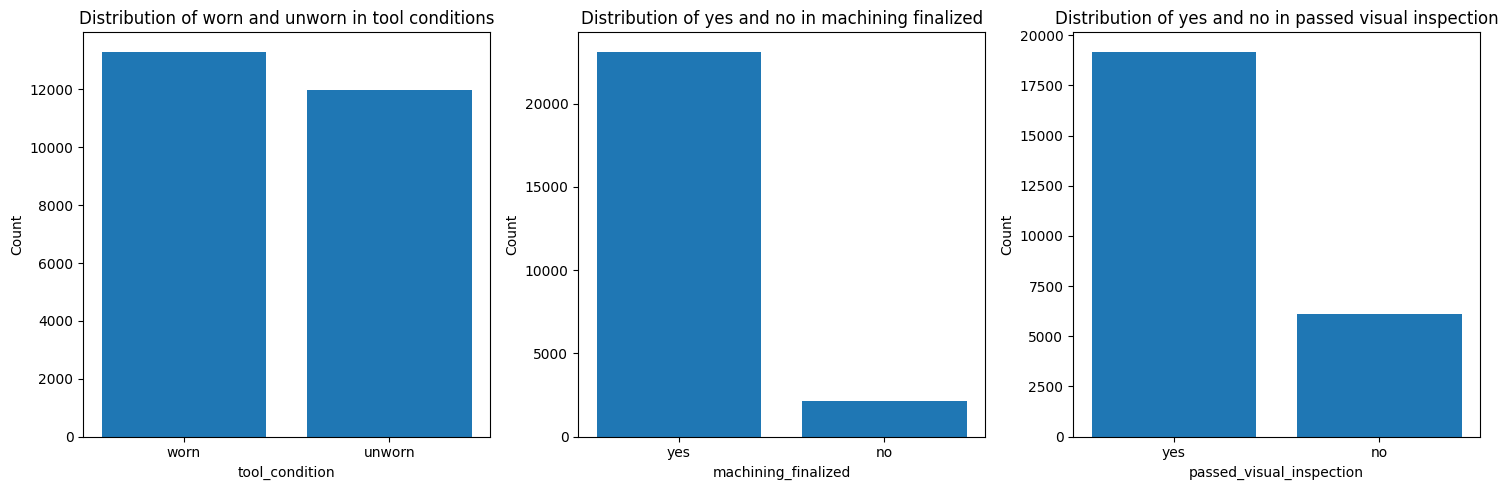

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(merged_data['tool_condition'].value_counts().index, merged_data['tool_condition'].value_counts().values)
axes[0].set_xlabel('tool_condition')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of worn and unworn in tool conditions')

axes[1].bar(merged_data['machining_finalized'].value_counts().index, merged_data['machining_finalized'].value_counts().values)
axes[1].set_xlabel('machining_finalized')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of yes and no in machining finalized')

axes[2].bar(merged_data['passed_visual_inspection'].value_counts().index, merged_data['passed_visual_inspection'].value_counts().values)
axes[2].set_xlabel('passed_visual_inspection')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of yes and no in passed visual inspection')

plt.tight_layout()

plt.show()


Machining Finalized for Worn Tools
 machining_finalized    no    yes
tool_condition                  
worn                 1167  12141
----------------------------------------
Machining Finalized for Unworn Tools
 machining_finalized   no    yes
tool_condition                 
unworn               994  10984
----------------------------------------



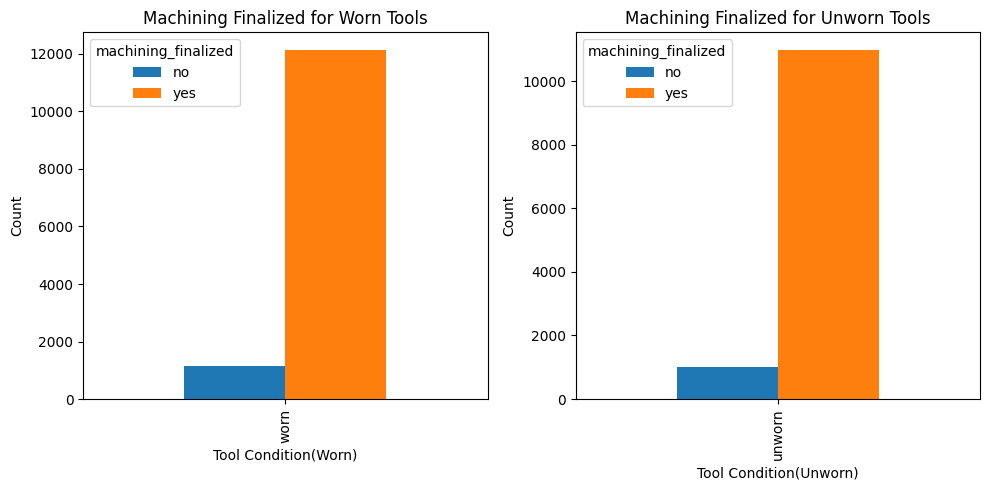

In [91]:
worn_tools = merged_data[merged_data['tool_condition'] == 'worn']
unworn_tools = merged_data[merged_data['tool_condition'] == 'unworn']

worn_tools_table = pd.crosstab(worn_tools['tool_condition'], worn_tools['machining_finalized'])
unworn_tools_table = pd.crosstab(unworn_tools['tool_condition'], unworn_tools['machining_finalized'])
print("Machining Finalized for Worn Tools\n",worn_tools_table)
print("----------------------------------------")
print("Machining Finalized for Unworn Tools\n",unworn_tools_table)
print("----------------------------------------\n")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

worn_tools_table.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Tool Condition(Worn)')
axes[0].set_ylabel('Count')
axes[0].set_title('Machining Finalized for Worn Tools')


unworn_tools_table.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Tool Condition(Unworn)')
axes[1].set_ylabel('Count')
axes[1].set_title('Machining Finalized for Unworn Tools')

#axes[0].legend(title='Finalized', fontsize=11)
#axes[1].legend(title='Finalized', fontsize=11)

plt.tight_layout()

plt.show()

Passed Visual Inspection for Worn Tools
 passed_visual_inspection    no   yes
tool_condition                      
worn                      5109  8199
----------------------------------------
Passed Visual Inspection for Unworn Tools
 passed_visual_inspection   no    yes
tool_condition                      
unworn                    994  10984
----------------------------------------



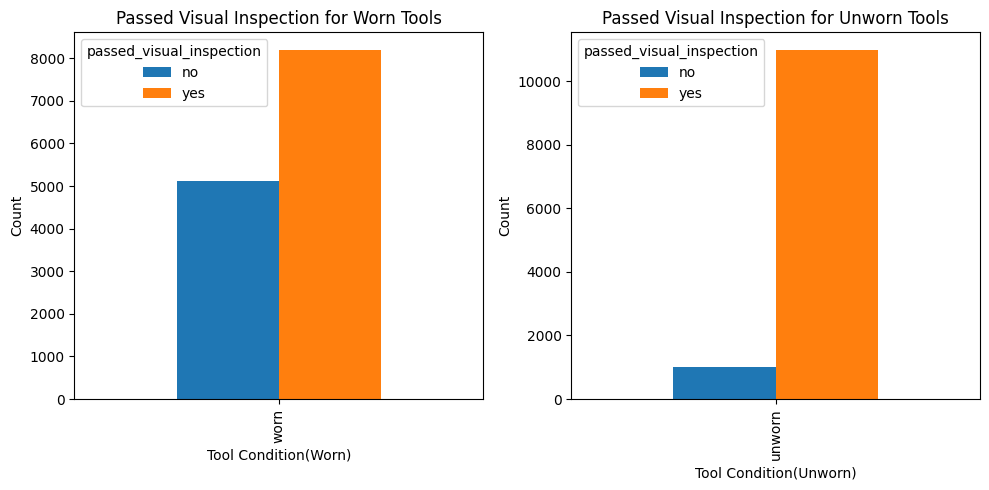

In [90]:
worn_tools_passed= pd.crosstab(worn_tools['tool_condition'], worn_tools['passed_visual_inspection'])
unworn_tools_passed=pd.crosstab(unworn_tools['tool_condition'], unworn_tools['passed_visual_inspection'])

print("Passed Visual Inspection for Worn Tools\n",worn_tools_passed)
print("----------------------------------------")
print("Passed Visual Inspection for Unworn Tools\n",unworn_tools_passed)
print("----------------------------------------\n")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

worn_tools_passed.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Tool Condition(Worn)')
axes[0].set_ylabel('Count')
axes[0].set_title('Passed Visual Inspection for Worn Tools')

unworn_tools_passed.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Tool Condition(Unworn)')
axes[1].set_ylabel('Count')
axes[1].set_title('Passed Visual Inspection for Unworn Tools')


plt.tight_layout()

plt.show()

Machining Finalized for Passed Visual Inspection
 machining_finalized         yes
passed_visual_inspection       
yes                       19183
----------------------------------------
Machining Finalized for Not Passed Visual Inspection
 machining_finalized         no   yes
passed_visual_inspection            
no                        2161  3942
----------------------------------------



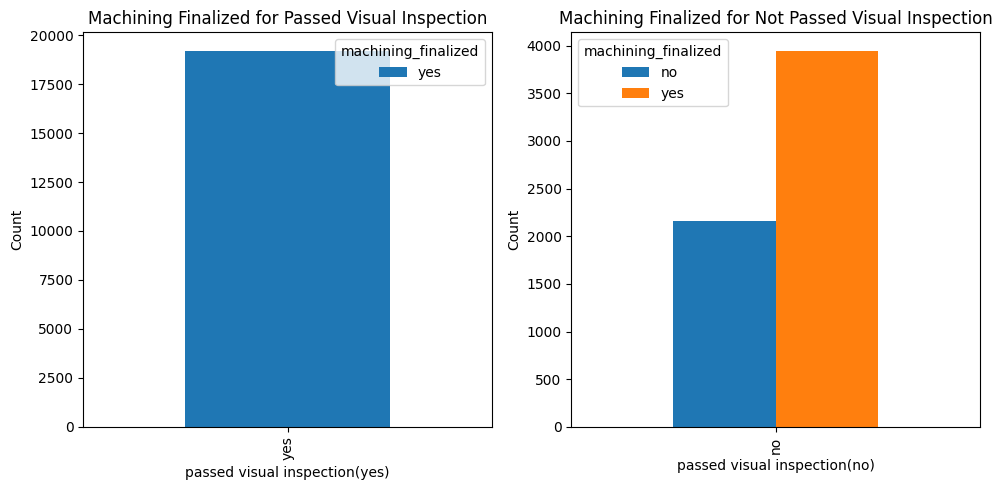

In [92]:
passed_visual = merged_data[merged_data['passed_visual_inspection'] == 'yes']
not_passed_visual = merged_data[merged_data['passed_visual_inspection'] == 'no']

passed_visual_tabel = pd.crosstab(passed_visual['passed_visual_inspection'], passed_visual['machining_finalized'])
not_passed_visual_tabel = pd.crosstab(not_passed_visual['passed_visual_inspection'], not_passed_visual['machining_finalized'])
print("Machining Finalized for Passed Visual Inspection\n",passed_visual_tabel)
print("----------------------------------------")
print("Machining Finalized for Not Passed Visual Inspection\n",not_passed_visual_tabel)
print("----------------------------------------\n")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

passed_visual_tabel.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('passed visual inspection(yes)')
axes[0].set_ylabel('Count')
axes[0].set_title('Machining Finalized for Passed Visual Inspection')

not_passed_visual_tabel.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('passed visual inspection(no)')
axes[1].set_ylabel('Count')
axes[1].set_title('Machining Finalized for Not Passed Visual Inspection')

plt.tight_layout()

plt.show()

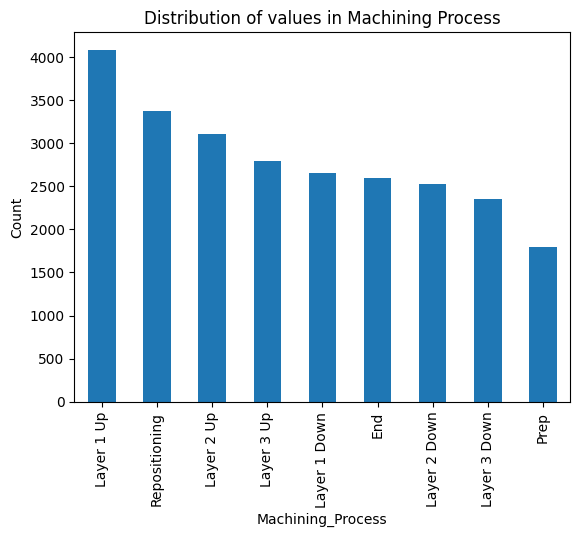

In [55]:
merged_data['Machining_Process'].value_counts().plot(kind='bar')
plt.xlabel('Machining_Process')
plt.ylabel('Count')
plt.title('Distribution of values in Machining Process')
plt.show()